In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lasa
Processing Record 2 of Set 1 | victoria
Processing Record 3 of Set 1 | campo de criptana
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | semnan
Processing Record 8 of Set 1 | tawnat
City not found. Skipping...
Processing Record 9 of Set 1 | geraldton
Processing Record 10 of Set 1 | anadyr
Processing Record 11 of Set 1 | cherskiy
Processing Record 12 of Set 1 | akdepe
Processing Record 13 of Set 1 | kidal
Processing Record 14 of Set 1 | san lorenzo
Processing Record 15 of Set 1 | maragogi
Processing Record 16 of Set 1 | maneadero
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | tuktoyaktuk
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | caravelas
Processing Record 22 of Set 1 | berehomet
Processing Record 23 o

Processing Record 39 of Set 4 | mar del plata
Processing Record 40 of Set 4 | general roca
Processing Record 41 of Set 4 | lompoc
Processing Record 42 of Set 4 | mehamn
Processing Record 43 of Set 4 | corrente
Processing Record 44 of Set 4 | port-gentil
Processing Record 45 of Set 4 | dingle
Processing Record 46 of Set 4 | gravelbourg
Processing Record 47 of Set 4 | ambon
Processing Record 48 of Set 4 | akyab
Processing Record 49 of Set 4 | netishyn
Processing Record 50 of Set 4 | sehithwa
Processing Record 1 of Set 5 | arlit
Processing Record 2 of Set 5 | itupiranga
Processing Record 3 of Set 5 | nassau
Processing Record 4 of Set 5 | novaya mayna
Processing Record 5 of Set 5 | nijar
Processing Record 6 of Set 5 | ayagoz
Processing Record 7 of Set 5 | houston
Processing Record 8 of Set 5 | muswellbrook
Processing Record 9 of Set 5 | talaya
Processing Record 10 of Set 5 | jiddah
City not found. Skipping...
Processing Record 11 of Set 5 | port hedland
Processing Record 12 of Set 5 | chic

Processing Record 25 of Set 8 | mayumba
Processing Record 26 of Set 8 | praia da vitoria
Processing Record 27 of Set 8 | havre-saint-pierre
Processing Record 28 of Set 8 | carutapera
Processing Record 29 of Set 8 | samarai
Processing Record 30 of Set 8 | great bend
Processing Record 31 of Set 8 | erenhot
Processing Record 32 of Set 8 | ta khmau
Processing Record 33 of Set 8 | flin flon
Processing Record 34 of Set 8 | wladyslawowo
Processing Record 35 of Set 8 | calvinia
Processing Record 36 of Set 8 | novaya bryan
Processing Record 37 of Set 8 | chinhoyi
Processing Record 38 of Set 8 | laranjeiro
Processing Record 39 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 40 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 41 of Set 8 | biak
Processing Record 42 of Set 8 | tuy hoa
Processing Record 43 of Set 8 | fenoarivo
Processing Record 44 of Set 8 | isoka
Processing Record 45 of Set 8 | mana
Processing Record 46 of Set 8 | rexburg
Processing Recor

Processing Record 14 of Set 12 | bara
Processing Record 15 of Set 12 | puerto del rosario
Processing Record 16 of Set 12 | tsabong
Processing Record 17 of Set 12 | roma
Processing Record 18 of Set 12 | komsomolskiy
Processing Record 19 of Set 12 | belaya gora
Processing Record 20 of Set 12 | copperas cove
Processing Record 21 of Set 12 | bargal
City not found. Skipping...
Processing Record 22 of Set 12 | nizwa
Processing Record 23 of Set 12 | namibe
Processing Record 24 of Set 12 | pathein
Processing Record 25 of Set 12 | billings
Processing Record 26 of Set 12 | harrisonville
Processing Record 27 of Set 12 | pudozh
Processing Record 28 of Set 12 | salto
Processing Record 29 of Set 12 | moerai
Processing Record 30 of Set 12 | gazanjyk
Processing Record 31 of Set 12 | kuching
Processing Record 32 of Set 12 | astana
Processing Record 33 of Set 12 | esfahan
Processing Record 34 of Set 12 | tondol
Processing Record 35 of Set 12 | san cristobal
Processing Record 36 of Set 12 | save
Processi

In [12]:
len(city_data)

563

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lasa,46.6166,10.7002,34.68,62,100,6.49,IT,2022-01-07 19:53:09
1,Victoria,22.2855,114.1577,64.38,82,60,5.99,HK,2022-01-07 19:51:29
2,Campo De Criptana,39.4046,-3.1249,40.14,65,1,8.19,ES,2022-01-07 19:49:51
3,Rikitea,-23.1203,-134.9692,77.36,76,96,17.34,PF,2022-01-07 19:53:10
4,Vaini,-21.2000,-175.2000,78.96,94,75,1.14,TO,2022-01-07 19:53:10
5,Port Alfred,-33.5906,26.8910,71.08,90,92,19.62,ZA,2022-01-07 19:53:11
6,Semnan,35.5729,53.3971,38.14,40,0,2.06,IR,2022-01-07 19:53:11
7,Geraldton,-28.7667,114.6000,73.13,88,100,12.66,AU,2022-01-07 19:53:11
8,Anadyr,64.7500,177.4833,-4.34,100,28,2.26,RU,2022-01-07 19:53:12
9,Cherskiy,68.7500,161.3000,-5.51,96,100,1.52,RU,2022-01-07 19:53:12


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [15]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lasa,IT,2022-01-07 19:53:09,46.6166,10.7002,34.68,62,100,6.49
1,Victoria,HK,2022-01-07 19:51:29,22.2855,114.1577,64.38,82,60,5.99
2,Campo De Criptana,ES,2022-01-07 19:49:51,39.4046,-3.1249,40.14,65,1,8.19
3,Rikitea,PF,2022-01-07 19:53:10,-23.1203,-134.9692,77.36,76,96,17.34
4,Vaini,TO,2022-01-07 19:53:10,-21.2000,-175.2000,78.96,94,75,1.14
5,Port Alfred,ZA,2022-01-07 19:53:11,-33.5906,26.8910,71.08,90,92,19.62
6,Semnan,IR,2022-01-07 19:53:11,35.5729,53.3971,38.14,40,0,2.06
7,Geraldton,AU,2022-01-07 19:53:11,-28.7667,114.6000,73.13,88,100,12.66
8,Anadyr,RU,2022-01-07 19:53:12,64.7500,177.4833,-4.34,100,28,2.26
9,Cherskiy,RU,2022-01-07 19:53:12,68.7500,161.3000,-5.51,96,100,1.52


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

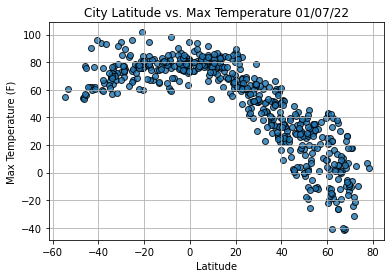

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

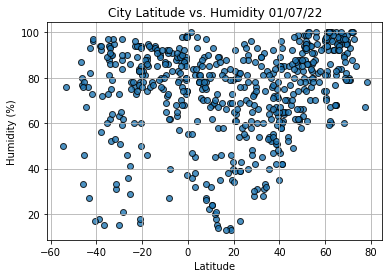

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

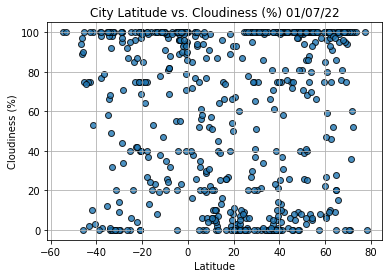

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

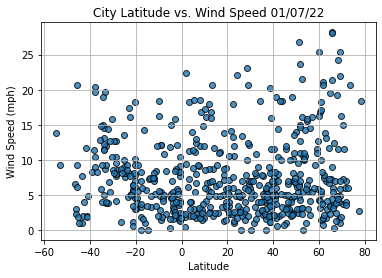

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [29]:
index13 = city_data_df.loc[13]
index13

City                     Maragogi
Country                        BR
Date          2022-01-07 19:51:37
Lat                       -9.0122
Lng                      -35.2225
Max Temp                    81.84
Humidity                       72
Cloudiness                     26
Wind Speed                  12.08
Name: 13, dtype: object

In [30]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lasa,IT,2022-01-07 19:53:09,46.6166,10.7002,34.68,62,100,6.49
1,Victoria,HK,2022-01-07 19:51:29,22.2855,114.1577,64.38,82,60,5.99
2,Campo De Criptana,ES,2022-01-07 19:49:51,39.4046,-3.1249,40.14,65,1,8.19
6,Semnan,IR,2022-01-07 19:53:11,35.5729,53.3971,38.14,40,0,2.06
8,Anadyr,RU,2022-01-07 19:53:12,64.7500,177.4833,-4.34,100,28,2.26


In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

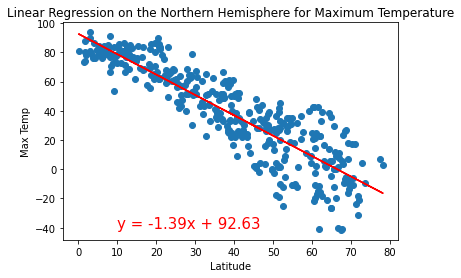

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,-40))

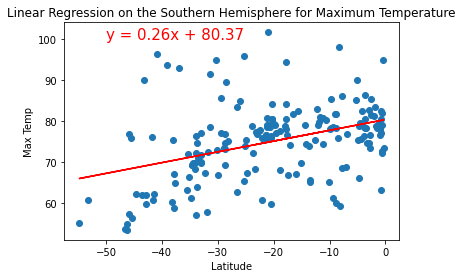

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,100))

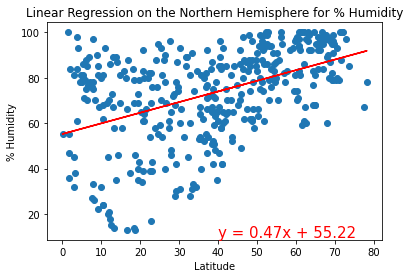

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

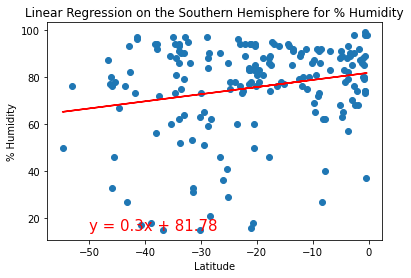

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

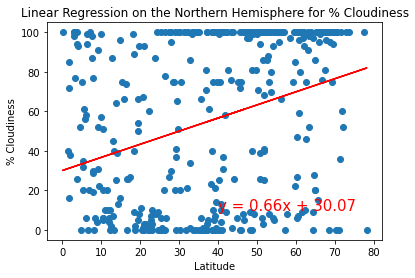

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

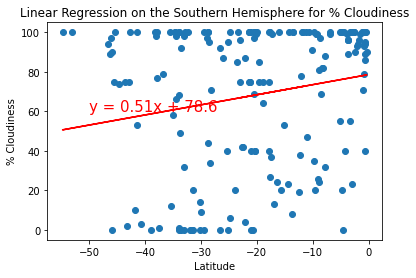

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

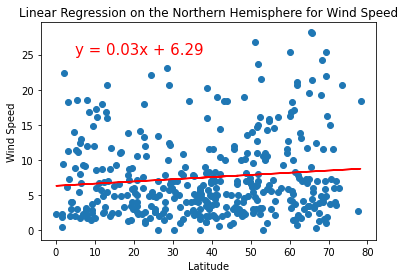

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(5,25))

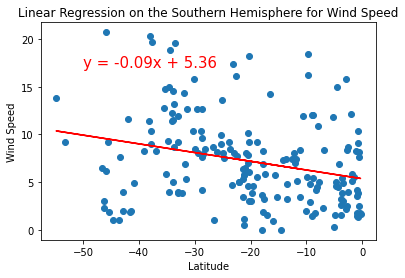

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,17))